<a href="https://colab.research.google.com/github/TetianaZabolotko/MLtrainings/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST

In [43]:
import numpy as np
import os

In [44]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [45]:
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
    sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')
mnist["data"], mnist["target"]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 0, 0, ..., 9, 9, 9], dtype=int8))




Scikit-Learn provides many helper functions to download popular datasets. MNIST is one of them. The following code fetches the MNIST dataset




In [46]:
# from sklearn.datasets import fetch_openml
# mnist = fetch_openml('mnist_784', version=1, cache=True)
# mnist = fetch_openml("mnist_784")

X, y = mnist['data'],mnist['target']
X,y

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 0, 0, ..., 9, 9, 9], dtype=int8))


*   A DESCR key describing the dataset

*    A data key containing an array with one row per instance and one column per
feature

* A target key containing an array with the labels

In [47]:
print(type(X))

<class 'numpy.ndarray'>


In [48]:
print(type(y))

<class 'numpy.ndarray'>


In [49]:
X.shape

(70000, 784)

There are 70,000 images, and each image has 784 features. This is because each image
is 28×28 pixels, and each feature simply represents one pixel’s intensity, from 0
(white) to 255 (black).

In [50]:
# X['pixel1']

In [51]:
# X['pixel1'].values

In [52]:
# X['pixel1'].values.shape

In [53]:
# X[['pixel1']]

In [54]:
# X[['pixel1']].values

In [55]:
# X[['pixel1']].values.shape

In [56]:
# X.iloc[5].values.shape

In [57]:
# X.iloc[[5]].values.shape

In [58]:
# X.iloc[[5]].values[:,3]

Let’s take a peek at one digit from the dataset

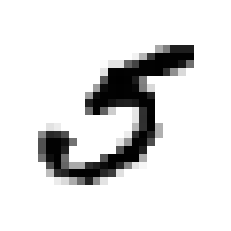

In [59]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit = X[36000]

some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
interpolation="nearest")
plt.axis("off")
plt.show()

In [60]:
y[36000]

5

The MNIST dataset is actually already split into a training set (the first 60,000
images) and a test set (the last 10,000 images):

In [61]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
y_train 

array([0, 0, 0, ..., 9, 9, 9], dtype=int8)

Let’s also shuffle the training set; this will guarantee that all cross-validation folds will
be similar (you don’t want one fold to be missing some digits)

In [62]:
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]
y_train

array([2, 6, 1, ..., 2, 7, 2], dtype=int8)

In [63]:
shuffle_index

array([13779, 37474,  6779, ..., 12756, 42871, 14446])

# Training a Binary Classifier

Let’s simplify the problem for now and only try to identify one digit—for example,
the number 5. This “5-detector” will be an example of a binary classifier, capable of
distinguishing between just two classes, 5 and not-5.

In [64]:
# y_train = y_train.astype(np.int8)
# y_test = y_test.astype(np.int8)
y_train_5 = (y_train == 5) # True for all 9s, False for all other digits
y_test_5 = (y_test == 5)

A good place to start is with a **Stochastic
Gradient Descent (SGD)** classifier, using Scikit-Learn’s **SGDClassifier class**. This classifier has the advantage of being capable of handling very large datasets efficiently.

The SGDClassifier relies on randomness during training (hence
the name “stochastic”). If you want reproducible results, you
should set the random_state parameter.

In [65]:
np.unique(y_train_5)

array([False,  True])

In [66]:
X_train.dtype

dtype('float64')

In [67]:
y_train.dtype


dtype('int8')

In [68]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(max_iter=5, random_state=42, tol=-inf)

In [69]:
sgd_clf.predict([some_digit])

array([ True])

Occasionally you will need more control over the cross-validation process than what
cross_val_score() and similar functions provide.

The StratifiedKFold class performs stratified sampling 
to produce folds that contain a representative ratio of each class

In [70]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95565, 0.9448 , 0.96205])

In [71]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)
for train_index, test_index in skfolds.split(X_train, y_train_5):
  clone_clf = clone(sgd_clf)
  X_train_folds = X_train[train_index]
  y_train_folds = (y_train_5[train_index])
  X_test_folds = X_train[test_index]
  y_test_folds = (y_train_5[test_index])

  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_folds)
  print(y_pred)
  n_correct = sum(y_pred == y_test_folds)
  print(n_correct)
  print(n_correct/len(y_pred))




[ True False False ... False False False]
19300
0.965
[False False False ... False False False]
19355
0.96775
[False False False ... False False False]
19199
0.95995


let’s look at a very
dumb classifier that just classifies every single image in the “not-5” class

In [72]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
  def fit(self, X, y=None):
    pass
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool)

That’s right, it has over 90% accuracy! This is simply because only about 10% of the
images are 5s, so if you always guess that an image is not a 5, you will be right about
90% of the time. Beats Nostradamus.
This demonstrates why accuracy is generally not the preferred performance measure
for classifiers, especially when you are dealing with skewed datasets (i.e., when some
classes are much more frequent than others)

In [73]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9101 , 0.9091 , 0.90975])

In [74]:
np.zeros([3,2], dtype=bool)

array([[False, False],
       [False, False],
       [False, False]])

# Confusion Matrix

Just like the cross_val_score() function, cross_val_predict() performs K-fold
cross-validation, but instead of returning the evaluation scores, it returns the predictions made on each test fold.

In [75]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

you are ready to get the confusion matrix using the confusion_matrix() func‐
tion. Just pass it the target classes (y_train_5) and the predicted classes
(y_train_pred):

In [76]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[54250,   329],
       [ 2421,  3000]])

Each row in a confusion matrix represents an**`actual class`**, while each column represents a **`predicted class`**

```
[ True Negative    False Positive]
[ False Negative   True Positive ]
```



In [77]:
y_train_perfect_predictions = y_train_5

confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

A perfect classifier would have only true positives and true
negatives, so its confusion matrix would have nonzero values only on its main diagonal (top left to bottom right)

The accuracy of the positive predictions is called the **```precision```** of the classifier



```
              TP
precision = -------
            TP + FP
```



A trivial way to have perfect precision is to make one single positive prediction and
ensure it is correct (precision = 1/1 = 100%). This would not be very useful since the
classifier would ignore all but one positive instance. So precision is typically used
along with another metric named **```recall```**, also called **```sensitivity```** or **```true positive rate
(TPR)```**: this is the ratio of positive instances that are correctly detected by the classifier

```
            TP
recall = ---------
          TP + FN
```

# Precision and Recall

In [78]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.9011715229798738

In [79]:
4351/(1348+4351)

0.7634672749605194

In [80]:
recall_score(y_train_5, y_train_pred)

0.5534034311012729

In [81]:
4351/(1070+4351)

0.8026194429072127

It claims an image represents a 5, it is correct only 87% of the time. Moreover,
it only detects 71% of the 5s.

It is often convenient to combine precision and recall into a single metric called the F1
score, in particular if you need a simple way to compare two classifiers. The F1 score is
the harmonic mean of precision and recall. Whereas the regular mean
treats all values equally, the harmonic mean gives much more weight to low values.
As a result, the classifier will only get a high F1 score if both recall and precision are
high.

```
               2
F1 = ------------------ 
         1          1
      --------- + -----
      precision   recall



In [82]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.6857142857142857

# Precision/Recall Tradeoff

For each instance, it computes a score based on a **decision function**,
and if that score is greater than a **threshold**, it assigns the instance to the positive
class, or else it assigns it to the negative class.

Instead of calling the classifier’s
predict() method, you can call its decision_function() method, which returns a
score for each instance

In [85]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([232069.54805759])

In [87]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

The SGDClassifier uses a threshold equal to 0, so the previous code returns the same
result as the predict() method (i.e., True). Let’s raise the threshold

In [89]:
threshold = 250000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

This confirms that raising the threshold decreases recall. The image actually represents a 5, and the classifier detects it when the threshold is 0, but it misses it when the
threshold is increased to 200,000.

For decision which threshold to use  first need to get the
scores of all instances in the training set using the `cross_val_predict()` function
again, but this time specifying that you want it to return decision scores instead of
predictions:

In [92]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
method="decision_function")
y_scores.shape

(60000,)

With these scores you can compute precision and recall for all possible thresholds using the `precision_recall_curve()` function:

In [100]:
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]

In [101]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [102]:
precisions.shape

(59682,)

In [103]:
recalls.shape

(59682,)

In [108]:
precisions[:-1].shape

(59681,)

In [115]:
thresholds.shape

(59681,)

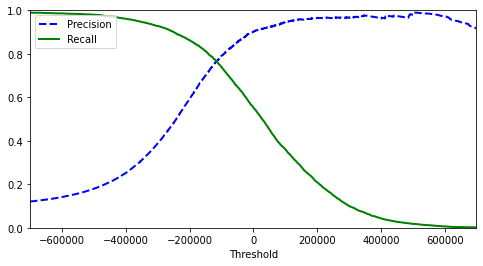

In [114]:
def plot_precision_recall_vs_threshold(precision, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], 'b--', label="Precision", linewidth=2)
  plt.plot(thresholds, recalls[:-1], 'g-', label="Recall", linewidth=2)
  plt.xlabel('Threshold')
  plt.legend(loc='upper left')
  plt.ylim([0,1])

plt.figure(figsize=(8,4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000,700000])
plt.show()


precision may sometimes go
down when you raise the threshold (although in general it will go
up)

# The ROC curve

# Multiclass Classification